# Creating a timeline with lines, dates, and text

Source: https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import json
    import urllib.request

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=1000'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    names = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            names.append(item['tag_name'])
    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    names = ['v2.2.4', 'v3.0.3', 'v3.0.2', 'v3.0.1', 'v3.0.0', 'v2.2.3',
             'v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0',
             'v2.0.2', 'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1',
             'v1.5.0', 'v1.4.3', 'v1.4.2', 'v1.4.1', 'v1.4.0']

    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

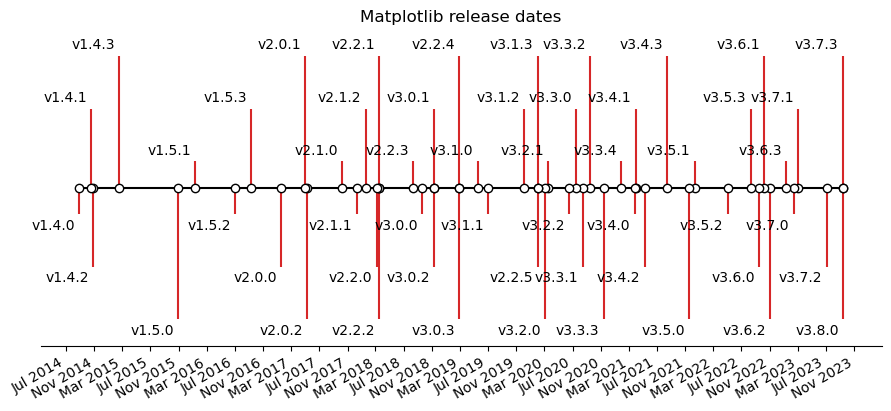

In [2]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format x-axis with 4-month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y-axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()